In [7]:
import numpy as np
import networkx as nx
from dotmotif import Motif, GrandIsoExecutor
import matplotlib.pyplot as plt
from scipy.stats import ranksums
from lsmm_data import LSMMData
import json
from tqdm import tqdm

with open('pyr_chains.json') as f:
    loaded_json = json.load(f)
my_data = LSMMData.LSMMData(loaded_json)
data_a = my_data.data
params_a = my_data.params
dirs_a = my_data.dirs
mappings_a = my_data.mappings

# Generate the chain results

# Make a graph
cell_table = data_a['structural']['pre_cell'].copy()
cell_table['connectome_index'] = cell_table.index
synapse_table = data_a['structural']['synapse']
adjacency_matrix = data_a['structural']['binary_connectome']
pyr_graph = nx.DiGraph()

# # Add edges to the graph
# rows, cols = data_a['structural']['binary_connectome'].shape
# for i in range(rows):
#     for j in range(cols):
#         if data_a['structural']['binary_connectome'][i, j] != 0:  # 0 means no edge
#             pyr_graph.add_edge(i, j, weight=data_a['structural']['binary_connectome'][i, j])

# Add edges to the graph
rows, cols = data_a['structural']['binary_connectome'].shape
for i in range(rows):
    for j in range(cols):
        if data_a['structural']['binary_connectome'][i, j] != 0:  # 0 means no edge
            pyr_graph.add_edge(f'pre_{i}', f'post_{j}', weight=data_a['structural']['binary_connectome'][i, j])


## Uncomment below to load existing chain motif analysis results
# two_chain_results_array = np.load('all_cell_two_chain_results_array.npy')
# three_chain_results_array = np.load('all_cell_three_chain_results_array.npy')
# four_chain_results_array = np.load('all_cell_four_chain_results_array.npy')


# Or uncomment below to generate new motif analysis results (Can take quite a while on larger graphs)
# Motif Analysis with DotMotif: 2 Chain, All Pyr
executor = GrandIsoExecutor(graph=pyr_graph)
chain_defs = Motif("""
                A -> B
              """)

chain_results = executor.find(chain_defs)

two_chain_results_array = np.array([list(c.values()) for c in tqdm(chain_results)])
removed_pre_post_strings = np.zeros_like(two_chain_results_array)
for i, c in enumerate(chain_results):
    for j, n in enumerate(c.values()):
        removed_pre_post_strings[i, j] = int(n.split('_')[1])

two_chain_results_array = np.array(removed_pre_post_strings).astype(int)

# two_chain_results_array = np.array([list(c.values()) for c in tqdm(chain_results)])

assembly_chain_results_arrays = [two_chain_results_array]

chain_count_string_array = ['pyr_cell_2chain']
individual_assembly_indexes = [mappings_a['connectome_indexes_by_assembly'][f'A {i}'] for i in range(1,15)]
individual_post_assembly_indexes = [mappings_a['post_connectome_indexes_by_assembly'][f'A {i}'] for i in range(1,15)]

coregistered_post_cell_indexes = mappings_a['assemblies_by_post_connectome_index'].keys()
coregistered_cell_indexes = mappings_a['assemblies_by_connectome_index'].keys()
no_a_cell_indexes = mappings_a['connectome_indexes_by_assembly']['No A']
no_a_post_cell_indexes = mappings_a['post_connectome_indexes_by_assembly']['No A']
pooled_assembly_indexes = [list(set(coregistered_cell_indexes) - set(no_a_cell_indexes))]
pooled_assembly_post_indexes = [list(set(coregistered_post_cell_indexes) - set(no_a_post_cell_indexes))]

zero_counts = 0
connections = 0
for ai in range(len(individual_assembly_indexes)):
    for pi in individual_assembly_indexes[ai]:
        for pp in individual_post_assembly_indexes[ai]:
            if len(two_chain_results_array[np.where(np.logical_and(two_chain_results_array[:,0] == pi, two_chain_results_array[:,-1] == pp))]) > 0:
                connections += 1
            else:
                zero_counts += 1
print(f'Pooled Intra-assembly Connections: {connections} out of {zero_counts + connections} possible')

zero_counts = 0
connections = 0
for pi in no_a_cell_indexes:
    for pp in no_a_post_cell_indexes:
        if len(two_chain_results_array[np.where(np.logical_and(two_chain_results_array[:,0] == pi, two_chain_results_array[:,-1] == pp))]) > 0:
            connections += 1
        else:
            zero_counts += 1
print(f'No A: {connections} out of {zero_counts + connections} possible')

# print('Assembly Root IDs:', list(set(mappings_a['assemblies_by_pt_root_id'].keys()) - set(mappings_a['pt_root_ids_by_assembly']['No A'])))
# print('NonAssembly Root IDs:', mappings_a['pt_root_ids_by_assembly']['No A'])
print(f'{len(coregistered_cell_indexes)} x {len(coregistered_post_cell_indexes)}')

# print(len(data_a['structural']['pre_cell']))
# print(len(data_a['structural']['synapse']))
# print(len(data_a['structural']['post_cell']))


Generating Connectome...


100%|██████████| 4565/4565 [00:00<00:00, 7195.99it/s]


Generating Connectome...


100%|██████████| 4565/4565 [00:00<00:00, 5506.01it/s]
3978it [00:00, 134601.57it/s]
100%|██████████| 3978/3978 [00:00<00:00, 1550356.93it/s]

Pooled Intra-assembly Connections: 33 out of 963 possible
No A: 4 out of 144 possible
55 x 55


In [8]:

paired_scaling_factors_two = [len(individual_assembly_indexes[i])*(len(individual_post_assembly_indexes[i])-1) for i in range(14)]

paired_scaling_factors_lists = [paired_scaling_factors_two]

pre_scaling_factors_two = [(len(individual_post_assembly_indexes[i])-1) for i in range(14)]
pre_scaling_factors_lists = [pre_scaling_factors_two]

paired_no_a_scaling_factors_two = len(no_a_cell_indexes)*(len(no_a_post_cell_indexes)-1)
paired_no_a_scaling_factors = [paired_no_a_scaling_factors_two]

pre_no_a_scaling_factors_two = (len(no_a_post_cell_indexes)-1)
pre_no_a_scaling_factors = [pre_no_a_scaling_factors_two]


### PRE CELLS ###


Assembly Connections Found: 33 out of 959
No A Connections Found: 4 out of 144

### PARTICIPATION ###
Wilcoxon Rank Sum Test: 
	Intra-assembly PRE-CELLS, normalized by possible post-cells (n-1)
	vs intra-nonassembly post-cells, normalized by possible post-cells (n-1)
A vs No A
RanksumsResult(statistic=0.7136412401400631, pvalue=0.23772452476413286)

Students T Test: 
	Intra-assembly PRE-CELLS, normalized by possible post-cells (n-1)
	vs intra-nonassembly post-cells, normalized by possible post-cells (n-1)
A vs No A
TtestResult(statistic=0.36306221251993587, pvalue=0.35974675740514844, df=26.0)

A Mean 0.10132783882783883 A Median 0.1111111111111111
No A Mean 0.09090909090909091 No A Median 0.09090909090909091

### SYNAPSE COUNT ###
Wilcoxon Rank Sum Test: 
	Intra-assembly PRE-CELLS, normalized by possible post-cells (n-1)
	vs intra-nonassembly pre-cells, normalized by possible post-cells (n-1)
A vs No A
RanksumsResult(statistic=-1.9625134103851736, pvalue=0.9751486295661957)

Students 

/home/stefan.berteau/.conda/envs/stat_conn_jax/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/home/stefan.berteau/.conda/envs/stat_conn_jax/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Text(0.5, 1.0, 'SUMMED PSD: Intra-assembly PRE-CELLS, normalized by possible post-cells (n-1)\n\tvs intra-nonassembly pre-cells, normalized by possible post-cells (n-1)')

/home/stefan.berteau/.conda/envs/stat_conn_jax/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)


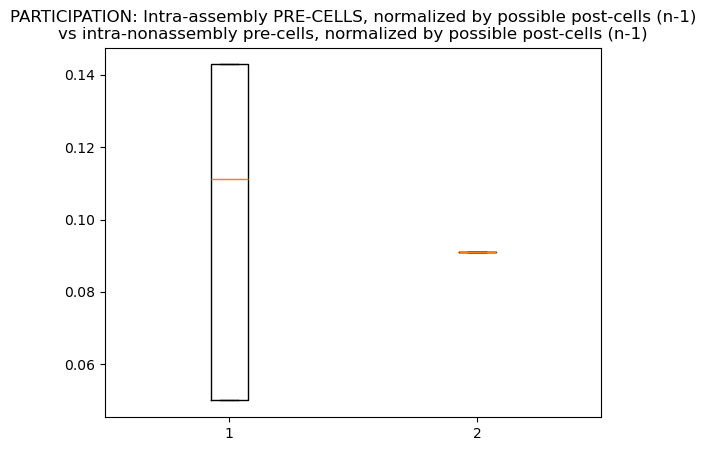

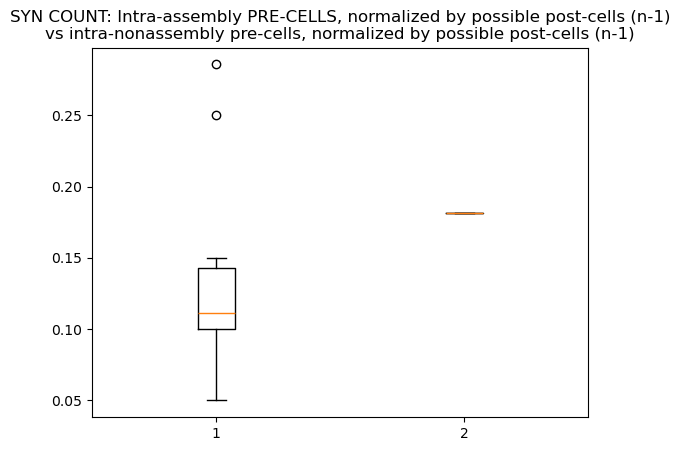

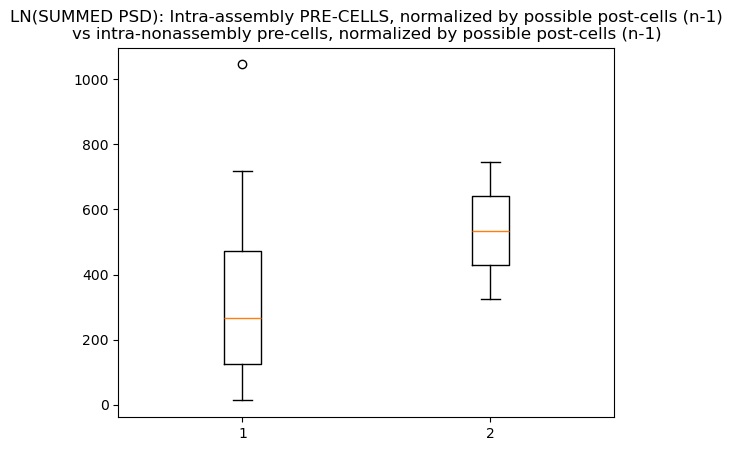

/home/stefan.berteau/.conda/envs/stat_conn_jax/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


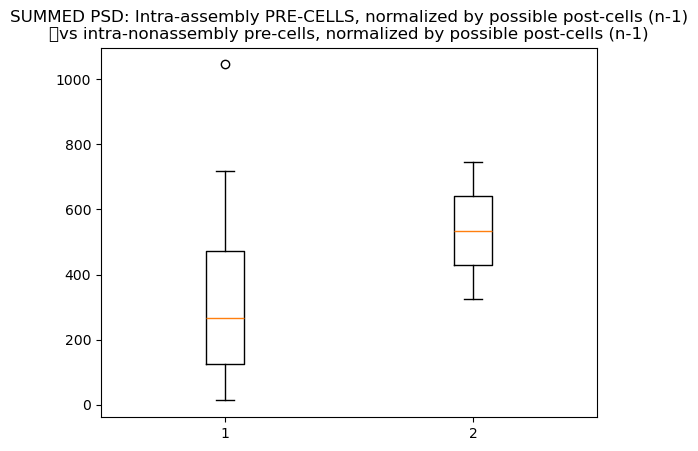

In [10]:
print("### PRE CELLS ###")

# Now Compare the two by PRE cells
synapse_table = data_a['structural']['synapse']
synapse_table['pre_connectome_index'] = [mappings_a['pt_root_id_to_connectome_index'][synapse_table.iloc[i]['pre_pt_root_id']] for i in range(len(synapse_table))]
synapse_table['post_connectome_index'] = [mappings_a['pt_root_id_to_post_connectome_index'][synapse_table.iloc[i]['post_pt_root_id']] for i in range(len(synapse_table))]

# Pool cells which are in assemblies
assembly_synapses_found = 0
assembly_no_synapses_found = 0
assembly_onechain_pooled_assembly_cell_participation = []
assembly_onechain_pooled_assembly_log_psd_volume = []
assembly_onechain_pooled_assembly_psd_volume = []
assembly_onechain_pooled_assembly_synapse_count = []
for chain_length_index in [0]: # For 2-chains, since longer can't be done in rectangular connectomes
    for a_index in range(14): #[0, 1, 2, 3, 4, 6, 7, 9]:
        scaling_factor = pre_scaling_factors_lists[chain_length_index][a_index]
        if scaling_factor > 0:
            for index1 in individual_assembly_indexes[a_index]:
                temp_sum = 0
                temp_nonlog_sum = 0
                temp_count = 0
                for index2 in individual_post_assembly_indexes[a_index]:
                    temp = synapse_table.query(f'pre_connectome_index == {index1} and post_connectome_index == {index2}')
                    if temp.shape[0] > 0:
                    # if len(temp > 0):
                        assembly_synapses_found += 1
                        metric = np.log(np.sum(temp['size'].values))
                        temp_nonlog_sum += np.sum(temp['size'].values) / scaling_factor
                        temp_sum += metric / scaling_factor
                        temp_count += temp.shape[0] / scaling_factor
                    else:
                        assembly_no_synapses_found += 1
                        # print(f'No synapses found for {index1} -> {index2}')
                if temp_sum > 0:
                    assembly_onechain_pooled_assembly_psd_volume.append(temp_nonlog_sum)
                    assembly_onechain_pooled_assembly_log_psd_volume.append(temp_sum)
                    assembly_onechain_pooled_assembly_synapse_count.append(temp_count)
                    assembly_onechain_pooled_assembly_cell_participation.append(1/scaling_factor) 
                # else:
                #     assembly_onechain_pooled_assembly_cell_participation.append(0)    

        # BREADCRUMB: Do the above, but for the next three.                 

no_a_onechain_pooled_assembly_psd_volume = []
no_a_onechain_pooled_assembly_log_psd_volume = []
no_a_onechain_pooled_assembly_synapse_count = []
no_a_onechain_pooled_assembly_cell_participation = []
nonassembly_synapses_found = 0
nonassembly_no_synapses_found = 0
for chain_length_index in [0]:
    # chain_counts = individual_chain_participations_by_coregistered_cell_pair[chain_length_index]
    scaling_factor = pre_no_a_scaling_factors[chain_length_index]
    if scaling_factor > 0:
        for index1 in no_a_cell_indexes:
                temp_sum = 0
                temp_nonlog_sum = 0
                temp_count = 0
                for index2 in no_a_post_cell_indexes:
                    temp = synapse_table.query(f'pre_connectome_index == {index1} and post_connectome_index == {index2}')
                    if temp.shape[0] > 0:
                    # if len(temp > 0):
                        nonassembly_synapses_found += 1
                        metric = np.log(np.sum(temp['size'].values))
                        temp_nonlog_sum += np.sum(temp['size'].values) / scaling_factor
                        temp_sum += metric / scaling_factor
                        temp_count += temp.shape[0] / scaling_factor
                    else:
                        nonassembly_no_synapses_found += 1
                if temp_sum > 0:
                    no_a_onechain_pooled_assembly_psd_volume.append(temp_nonlog_sum)
                    no_a_onechain_pooled_assembly_log_psd_volume.append(temp_sum)
                    no_a_onechain_pooled_assembly_synapse_count.append(temp_count)
                    no_a_onechain_pooled_assembly_cell_participation.append(1/scaling_factor)   
                # else:
                #     no_a_onechain_pooled_assembly_cell_participation.append(0)    
        
print(f'Assembly Connections Found: {assembly_synapses_found} out of {assembly_synapses_found + assembly_no_synapses_found}')
print(f'No A Connections Found: {nonassembly_synapses_found} out of {nonassembly_synapses_found + nonassembly_no_synapses_found}')


import scipy.stats as stats

# Perform Wilcoxon Rank Sum Test
print("\n### PARTICIPATION ###")
print(f'Wilcoxon Rank Sum Test: \n\tIntra-assembly PRE-CELLS, normalized by possible post-cells (n-1)\n\tvs intra-nonassembly post-cells, normalized by possible post-cells (n-1)')
print('A vs No A')
print(stats.ranksums(assembly_onechain_pooled_assembly_cell_participation, no_a_onechain_pooled_assembly_cell_participation, alternative='greater'))


# print("\nNormality Tests:")
# print("A: ", {stats.normaltest(assembly_onechain_pooled_assembly_cell_participation)})
# print("No A: ", {stats.normaltest(no_a_onechain_pooled_assembly_cell_participation)})


print(f'\nStudents T Test: \n\tIntra-assembly PRE-CELLS, normalized by possible post-cells (n-1)\n\tvs intra-nonassembly post-cells, normalized by possible post-cells (n-1)')
print('A vs No A')
print(stats.ttest_ind(assembly_onechain_pooled_assembly_cell_participation, no_a_onechain_pooled_assembly_cell_participation, alternative='greater'))

print('\nA Mean', np.mean(assembly_onechain_pooled_assembly_cell_participation), 'A Median', np.median(assembly_onechain_pooled_assembly_cell_participation))
print('No A Mean', np.mean(no_a_onechain_pooled_assembly_cell_participation), 'No A Median', np.median(no_a_onechain_pooled_assembly_cell_participation))

plt.figure()
plt.boxplot([assembly_onechain_pooled_assembly_cell_participation, no_a_onechain_pooled_assembly_cell_participation])
plt.title('PARTICIPATION: Intra-assembly PRE-CELLS, normalized by possible post-cells (n-1)\nvs intra-nonassembly pre-cells, normalized by possible post-cells (n-1)')



print("\n### SYNAPSE COUNT ###")
print(f'Wilcoxon Rank Sum Test: \n\tIntra-assembly PRE-CELLS, normalized by possible post-cells (n-1)\n\tvs intra-nonassembly pre-cells, normalized by possible post-cells (n-1)')
print('A vs No A')
print(stats.ranksums(assembly_onechain_pooled_assembly_synapse_count, no_a_onechain_pooled_assembly_synapse_count, alternative='greater'))

# print("\nNormality Tests:")
# print("A: ", {stats.normaltest(assembly_onechain_pooled_assembly_synapse_count)})
# print("No A: ", {stats.normaltest(no_a_onechain_pooled_assembly_synapse_count)})

print(f'\nStudents T Test: \n\tIntra-assembly PRE-CELLS, normalized by possible post-cells (n-1)\n\tvs intra-nonassembly pre-cells, normalized by possible post-cells (n-1)')
print('A vs No A')
print(stats.ttest_ind(assembly_onechain_pooled_assembly_synapse_count, no_a_onechain_pooled_assembly_synapse_count, alternative='greater'))

print('A Mean', np.mean(assembly_onechain_pooled_assembly_synapse_count), 'A Median', np.median(assembly_onechain_pooled_assembly_synapse_count))
print('No A Mean', np.mean(no_a_onechain_pooled_assembly_synapse_count), 'No A Median', np.median(no_a_onechain_pooled_assembly_synapse_count))

plt.figure()
plt.boxplot([assembly_onechain_pooled_assembly_synapse_count, no_a_onechain_pooled_assembly_synapse_count])
plt.title('SYN COUNT: Intra-assembly PRE-CELLS, normalized by possible post-cells (n-1)\nvs intra-nonassembly pre-cells, normalized by possible post-cells (n-1)')


print("\n### LN(SUMMED PSD) ###")
print(f'Wilcoxon Rank Sum Test: \n\tIntra-assembly PRE-CELLS, normalized by possible post-cells (n-1)\n\tvs intra-nonassembly pre-cells, normalized by possible post-cells (n-1)')
print('A vs No A')
print(stats.ranksums(assembly_onechain_pooled_assembly_psd_volume, no_a_onechain_pooled_assembly_psd_volume, alternative='greater'))

# print("\nNormality Tests:")
# print("A: ", {stats.normaltest(assembly_onechain_pooled_assembly_log_psd_volume)})
# print("No A: ", {stats.normaltest(no_a_onechain_pooled_assembly_log_psd_volume)})

print(f'\nStudents T Test: \n\tIntra-assembly PRE-CELLS, normalized by possible post-cells (n-1)\n\tvs intra-nonassembly pre-cells, normalized by possible post-cells (n-1)')
print('A vs No A')
print(stats.ttest_ind(assembly_onechain_pooled_assembly_psd_volume, no_a_onechain_pooled_assembly_psd_volume, alternative='greater'))

print('A Mean', np.mean(assembly_onechain_pooled_assembly_log_psd_volume), 'A Median', np.median(assembly_onechain_pooled_assembly_log_psd_volume))
print('No A Mean', np.mean(no_a_onechain_pooled_assembly_log_psd_volume), 'No A Median', np.median(no_a_onechain_pooled_assembly_log_psd_volume))

plt.figure()
plt.boxplot([assembly_onechain_pooled_assembly_psd_volume, no_a_onechain_pooled_assembly_psd_volume])
plt.title('LN(SUMMED PSD): Intra-assembly PRE-CELLS, normalized by possible post-cells (n-1)\nvs intra-nonassembly pre-cells, normalized by possible post-cells (n-1)')


print("\n### SUMMED PSD ###")
print(f'Wilcoxon Rank Sum Test: \n\tIntra-assembly PRE-CELLS, normalized by possible post-cells (n-1)\n\tvs intra-nonassembly pre-cells, normalized by possible post-cells (n-1)')
print('A vs No A')
print(stats.ranksums(assembly_onechain_pooled_assembly_psd_volume, no_a_onechain_pooled_assembly_psd_volume, alternative='greater'))

# print("\nNormality Tests:")
# print("A: ", {stats.normaltest(assembly_onechain_pooled_assembly_psd_volume)})
# print("No A: ", {stats.normaltest(no_a_onechain_pooled_assembly_psd_volume)})

print(f'\nStudents T Test: \n\tIntra-assembly PRE-CELLS, normalized by possible post-cells (n-1)\n\tvs intra-nonassembly pre-cells, normalized by possible post-cells (n-1)')
print('A vs No A')
print(stats.ttest_ind(assembly_onechain_pooled_assembly_psd_volume, no_a_onechain_pooled_assembly_psd_volume, alternative='greater'))

print('A Mean', np.mean(assembly_onechain_pooled_assembly_psd_volume), 'A Median', np.median(assembly_onechain_pooled_assembly_psd_volume))
print('No A Mean', np.mean(no_a_onechain_pooled_assembly_psd_volume), 'No A Median', np.median(no_a_onechain_pooled_assembly_psd_volume))

plt.figure()
plt.boxplot([assembly_onechain_pooled_assembly_psd_volume, no_a_onechain_pooled_assembly_psd_volume])
plt.title('SUMMED PSD: Intra-assembly PRE-CELLS, normalized by possible post-cells (n-1)\n\tvs intra-nonassembly pre-cells, normalized by possible post-cells (n-1)')


In [ ]:
print("### CELL PAIRS ###")

# Now Compare the two by cell pairs
synapse_table = data_a['structural']['synapse']
synapse_table['pre_connectome_index'] = [mappings_a['pt_root_id_to_connectome_index'][synapse_table.iloc[i]['pre_pt_root_id']] for i in range(len(synapse_table))]
synapse_table['post_connectome_index'] = [mappings_a['pt_root_id_to_post_connectome_index'][synapse_table.iloc[i]['post_pt_root_id']] for i in range(len(synapse_table))]

# Pool all chain lengths
# Pool cells which are in assemblies
assembly_synapses_found = 0
assembly_no_synapses_found = 0
assembly_onechain_pooled_assembly_cell_participation = []
assembly_onechain_pooled_assembly_log_psd_volume = []
assembly_onechain_pooled_assembly_psd_volume = []
assembly_onechain_pooled_assembly_synapse_count = []
# BREADCRUMB: Plot values at each index along the x axis, so I can see if the highs and lows balance out to explain the pre-cell grouping results?

for chain_length_index in [0]:
    # chain_counts = individual_chain_participations_by_coregistered_cell_pair[chain_length_index]
    for a_index in range(14): #[0, 1, 2, 3, 4, 6, 7, 9]:
        scaling_factor = pre_scaling_factors_lists[chain_length_index][a_index]
        if scaling_factor > 0:
            for index1 in individual_assembly_indexes[a_index]:
                for index2 in individual_post_assembly_indexes[a_index]:
                    temp = synapse_table.query(f'pre_connectome_index == {index1} and post_connectome_index == {index2}')
                    if temp.shape[0] > 0:
                        assembly_synapses_found += 1
                        metric = np.log(np.sum(temp['size'].values))
                        assembly_onechain_pooled_assembly_psd_volume.append(np.sum(temp['size'].values) / scaling_factor)
                        assembly_onechain_pooled_assembly_synapse_count.append(temp.shape[0] / scaling_factor)
                        assembly_onechain_pooled_assembly_log_psd_volume.append(metric / scaling_factor) 
                        assembly_onechain_pooled_assembly_cell_participation.append( 1 / scaling_factor)
                    else:
                        assembly_onechain_pooled_assembly_cell_participation.append(0)
                        assembly_no_synapses_found += 1

no_a_onechain_pooled_assembly_log_psd_volume = []
no_a_onechain_pooled_assembly_psd_volume = []
no_a_onechain_pooled_assembly_synapse_count = []
no_a_onechain_pooled_assembly_cell_participation = []
nonassembly_synapses_found = 0
nonassembly_no_synapses_found = 0
for chain_length_index in [0]:
    # chain_counts = individual_chain_participations_by_coregistered_cell_pair[chain_length_index]
    scaling_factor = pre_no_a_scaling_factors[chain_length_index]
    if scaling_factor > 0:
        for index1 in no_a_cell_indexes:
            temp_sum = 0
            for index2 in no_a_post_cell_indexes:
                temp = synapse_table.query(f'pre_connectome_index == {index1} and post_connectome_index == {index2}')
                if temp.shape[0] > 0:
                    nonassembly_synapses_found += 1
                    metric = np.log(np.sum(temp['size'].values))
                    no_a_onechain_pooled_assembly_psd_volume.append(np.sum(temp['size'].values) / scaling_factor)
                    no_a_onechain_pooled_assembly_log_psd_volume.append(metric / scaling_factor)
                    no_a_onechain_pooled_assembly_synapse_count.append(temp.shape[0] / scaling_factor)
                    no_a_onechain_pooled_assembly_cell_participation.append(1 / scaling_factor)
                else:
                    nonassembly_no_synapses_found += 1
                    no_a_onechain_pooled_assembly_cell_participation.append(0)
                 
print(f'Assembly Synapses Found: {assembly_synapses_found} out of {assembly_synapses_found + assembly_no_synapses_found}')
print(f'No A Synapses Found: {nonassembly_synapses_found} out of {nonassembly_synapses_found + nonassembly_no_synapses_found}')

import scipy.stats as stats

# Perform Wilcoxon Rank Sum Test
print('\n### PARTICIPATION ###')
print(f'Wilcoxon Rank Sum Test: \n\tIntra-assembly PAIRS, normalized by possible pairs n(n-1)\n\tvs intra-nonassembly pairs, normalized by possible pairs n(n-1)')
print('A vs No A')
print(stats.ranksums(assembly_onechain_pooled_assembly_cell_participation, no_a_onechain_pooled_assembly_cell_participation, alternative='greater'))

print("\nNormality Tests:")
print("A: ", {stats.normaltest(assembly_onechain_pooled_assembly_cell_participation)})
print("No A: ", {stats.normaltest(no_a_onechain_pooled_assembly_cell_participation)})

print(f'\nStudents T Test: \n\tIntra-assembly PAIRS, normalized by possible pairs n(n-1)\n\tvs intra-nonassembly pairs, normalized by possible pairs n(n-1)')
print('A vs No A')
print(stats.ttest_ind(assembly_onechain_pooled_assembly_cell_participation, no_a_onechain_pooled_assembly_cell_participation, alternative='greater'))

print('\nA Mean', np.mean(assembly_onechain_pooled_assembly_cell_participation), 'A Median', np.median(assembly_onechain_pooled_assembly_cell_participation))
print('No A Mean', np.mean(no_a_onechain_pooled_assembly_cell_participation), 'No A Median', np.median(no_a_onechain_pooled_assembly_cell_participation))

plt.figure()
plt.boxplot([assembly_onechain_pooled_assembly_cell_participation, no_a_onechain_pooled_assembly_cell_participation])
plt.title('PARTICIPATION: Intra-assembly PAIRS, normalized by possible pairs n(n-1)\nvs intra-nonassembly pairs, normalized by possible pairs n(n-1)')


print("\n### SYNAPSE COUNT ###")
print(f'Wilcoxon Rank Sum Test: \n\tIntra-assembly PAIRS, normalized by possible pairs n(n-1)\n\tvs intra-nonassembly pairs, normalized by possible pairs n(n-1)')
print('A vs No A')
print(stats.ranksums(assembly_onechain_pooled_assembly_synapse_count, no_a_onechain_pooled_assembly_synapse_count, alternative='greater'))

print("\nNormality Tests:")
print("A: ", {stats.normaltest(assembly_onechain_pooled_assembly_synapse_count)})
print("No A: ", {stats.normaltest(no_a_onechain_pooled_assembly_synapse_count)})

print(f'\nStudents T Test: \n\tIntra-assembly PAIRS, normalized by possible pairs n(n-1)\n\tvs intra-nonassembly pairs, normalized by possible pairs n(n-1)')
print('A vs No A')
print(stats.ttest_ind(assembly_onechain_pooled_assembly_synapse_count, no_a_onechain_pooled_assembly_synapse_count, alternative='greater'))

print('A Mean', np.mean(assembly_onechain_pooled_assembly_synapse_count), 'A Median', np.median(assembly_onechain_pooled_assembly_synapse_count))
print('No A Mean', np.mean(no_a_onechain_pooled_assembly_synapse_count), 'No A Median', np.median(no_a_onechain_pooled_assembly_synapse_count))

plt.figure()
plt.boxplot([assembly_onechain_pooled_assembly_synapse_count, no_a_onechain_pooled_assembly_synapse_count])
plt.title('SYN COUNT: Intra-assembly PAIRS, normalized by possible pairs n(n-1)\nvs intra-nonassembly pairs, normalized by possible pairs n(n-1)')


print("\n### LN(SUMMED PSD) ###")
print(f'Wilcoxon Rank Sum Test: \n\tIntra-assembly PAIRS, normalized by possible pairs n(n-1)\n\tvs intra-nonassembly pairs, normalized by possible pairs n(n-1)')
print('A vs No A')
print(stats.ranksums(assembly_onechain_pooled_assembly_log_psd_volume, no_a_onechain_pooled_assembly_log_psd_volume, alternative='greater'))

print("\nNormality Tests:")
print("A: ", {stats.normaltest(assembly_onechain_pooled_assembly_log_psd_volume)})
print("No A: ", {stats.normaltest(no_a_onechain_pooled_assembly_log_psd_volume)})

print(f'\nStudents T Test: \n\tIntra-assembly PAIRS, normalized by possible pairs n(n-1)\n\tvs intra-nonassembly pairs, normalized by possible pairs n(n-1)')
print('A vs No A')
print(stats.ttest_ind(assembly_onechain_pooled_assembly_log_psd_volume, no_a_onechain_pooled_assembly_log_psd_volume, alternative='greater'))

print('A Mean', np.mean(assembly_onechain_pooled_assembly_log_psd_volume), 'A Median', np.median(assembly_onechain_pooled_assembly_log_psd_volume))
print('No A Mean', np.mean(no_a_onechain_pooled_assembly_log_psd_volume), 'No A Median', np.median(no_a_onechain_pooled_assembly_log_psd_volume))

plt.figure()
plt.boxplot([assembly_onechain_pooled_assembly_log_psd_volume, no_a_onechain_pooled_assembly_log_psd_volume])
plt.title('LN(SUMMED PSD): Intra-assembly PAIRS, normalized by possible pairs n(n-1)\nvs intra-nonassembly pairs, normalized by possible pairs n(n-1)')


print("\n### SUMMED PSD ###")
print(f'Wilcoxon Rank Sum Test: \n\tIntra-assembly PAIRS, normalized by possible pairs n(n-1)\n\tvs intra-nonassembly pairs, normalized by possible pairs n(n-1)')
print('A vs No A')
print(stats.ranksums(assembly_onechain_pooled_assembly_psd_volume, no_a_onechain_pooled_assembly_psd_volume, alternative='greater'))

print("\nNormality Tests:")
print("A: ", {stats.normaltest(assembly_onechain_pooled_assembly_psd_volume)})
print("No A: ", {stats.normaltest(no_a_onechain_pooled_assembly_psd_volume)})

print(f'\nStudents T Test: \n\tIntra-assembly PAIRS, normalized by possible pairs n(n-1)\n\tvs intra-nonassembly pairs, normalized by possible pairs n(n-1)')
print('A vs No A')
print(stats.ttest_ind(assembly_onechain_pooled_assembly_psd_volume, no_a_onechain_pooled_assembly_psd_volume, alternative='greater'))

print('A Mean', np.mean(assembly_onechain_pooled_assembly_psd_volume), 'A Median', np.median(assembly_onechain_pooled_assembly_psd_volume))
print('No A Mean', np.mean(no_a_onechain_pooled_assembly_psd_volume), 'No A Median', np.median(no_a_onechain_pooled_assembly_psd_volume))

plt.figure()
plt.boxplot([assembly_onechain_pooled_assembly_psd_volume, no_a_onechain_pooled_assembly_psd_volume])
plt.title('SUMMED PSD: Intra-assembly PAIRS, normalized by possible pairs n(n-1)\nvs intra-nonassembly pairs, normalized by possible pairs n(n-1)')



In [ ]:
print(len(assembly_onechain_pooled_assembly_cell_participation))
print(len(no_a_onechain_pooled_assembly_cell_participation))
print(len(no_a_cell_indexes))
print(len(no_a_post_cell_indexes))
12*33
print(no_a_onechain_pooled_assembly_cell_participation)